In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

data_all=pd.read_csv('data/commits_all.csv')
df = data_all.copy()

In [46]:
df

,sha,author,date,committer,message,comment_count
0,d928a5cc222be5968b2f1f8a5f8d02977a8d6c2d,Luke Manley,2024-01-25T16:25:03Z,GitHub,REGR: perf regression in Series.combine_first ...,0
1,736868671044605b0f2c2cc23ab5ea09fbc9a2ac,Matthew Roeschke,2024-01-25T01:01:42Z,GitHub,COMPAT: Make argsort compatable with numpy 2.0...,0
2,aaa276043223821bf743e51b373148b41cbf857d,Matthew Roeschke,2024-01-24T22:36:47Z,GitHub,BUG: Series.pct_change with empty Series (#57058),0
3,622f31c9c455c64751b03b18e357b8f7bd1af0fd,Luke Manley,2024-01-24T02:52:01Z,GitHub,PERF: Index.join to maintain cached attributes...,0
4,3c96b8ff6d399fbec8d4d533e8e8618c592bb64b,Luke Manley,2024-01-23T18:02:27Z,GitHub,PERF: StringEngine for string dtype indexing o...,0
...,...,...,...,...,...,...
26995,b0c290f4879a542b027b4c36a922f5ae2216ed5a,John McNamara,2013-09-16T19:54:02Z,John McNamara,ENH: Added xlsxwriter as an ExcelWriter option...,0
26996,ebfb4c8a91d8d566317d9a973f827a165d15e4ae,Jeff Tratner,2013-09-22T22:17:09Z,Jeff Tratner,Merge pull request #4909 from jtratner/add-is_...,0
26997,0ea6de50cd2657ed0d77b10135d69067160422b8,Jeffrey Tratner,2013-09-18T02:30:53Z,Jeffrey Tratner,ENH: Add 'is_' method to Index for identity ch...,0
26998,0eab18794b95b243cf7df401e674626dadb27314,jreback,2013-09-22T19:28:16Z,jreback,Merge pull request #4938 from jreback/panel_co...,0


In [47]:
df['date'] = pd.to_datetime(df['date'])

df

,sha,author,date,committer,message,comment_count
0,d928a5cc222be5968b2f1f8a5f8d02977a8d6c2d,Luke Manley,2024-01-25 16:25:03+00:00,GitHub,REGR: perf regression in Series.combine_first ...,0
1,736868671044605b0f2c2cc23ab5ea09fbc9a2ac,Matthew Roeschke,2024-01-25 01:01:42+00:00,GitHub,COMPAT: Make argsort compatable with numpy 2.0...,0
2,aaa276043223821bf743e51b373148b41cbf857d,Matthew Roeschke,2024-01-24 22:36:47+00:00,GitHub,BUG: Series.pct_change with empty Series (#57058),0
3,622f31c9c455c64751b03b18e357b8f7bd1af0fd,Luke Manley,2024-01-24 02:52:01+00:00,GitHub,PERF: Index.join to maintain cached attributes...,0
4,3c96b8ff6d399fbec8d4d533e8e8618c592bb64b,Luke Manley,2024-01-23 18:02:27+00:00,GitHub,PERF: StringEngine for string dtype indexing o...,0
...,...,...,...,...,...,...
26995,b0c290f4879a542b027b4c36a922f5ae2216ed5a,John McNamara,2013-09-16 19:54:02+00:00,John McNamara,ENH: Added xlsxwriter as an ExcelWriter option...,0
26996,ebfb4c8a91d8d566317d9a973f827a165d15e4ae,Jeff Tratner,2013-09-22 22:17:09+00:00,Jeff Tratner,Merge pull request #4909 from jtratner/add-is_...,0
26997,0ea6de50cd2657ed0d77b10135d69067160422b8,Jeffrey Tratner,2013-09-18 02:30:53+00:00,Jeffrey Tratner,ENH: Add 'is_' method to Index for identity ch...,0
26998,0eab18794b95b243cf7df401e674626dadb27314,jreback,2013-09-22 19:28:16+00:00,jreback,Merge pull request #4938 from jreback/panel_co...,0


In [48]:
#设置一列为commit_count
df['commit_count'] = 1
#只保留日期，删除时间
df['date'] = df['date'].dt.date

df_time = df.drop(['sha','author','comment_count','committer','message'], axis=1)

df_grouped = df_time.groupby('date').agg({'commit_count': 'sum'}).reset_index()
# 打印结果
print(df_grouped)

            date  commit_count
0     2013-03-15             1
1     2013-05-02             1
2     2013-05-03             1
3     2013-06-10             1
4     2013-06-23             1
...          ...           ...
3552  2024-01-21             1
3553  2024-01-22            10
3554  2024-01-23             7
3555  2024-01-24             2
3556  2024-01-25             2

[3557 rows x 2 columns]


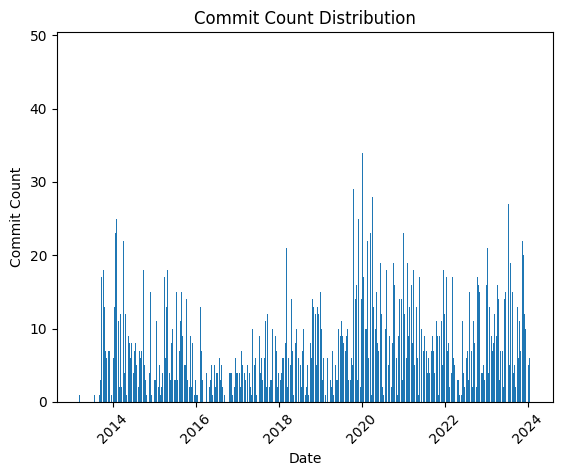

In [49]:
# 绘制直方图
plt.bar(df_grouped['date'], df_grouped['commit_count'], width=0.8)

# 设置标题和标签
plt.title('Commit Count Distribution')
plt.xlabel('Date')
plt.ylabel('Commit Count')

# 设置刻度标记的格式
plt.xticks(rotation=45)

# 显示图表
plt.show()

In [55]:
df['date'] = pd.to_datetime(df['date'])
# 提取年份
df['year'] = df['date'].dt.year
# 按年份进行分组并计算每个年份的总和
df['year_count'] = 1
df_year = df.drop(['sha','author','comment_count','committer','message','date','commit_count'], axis=1)
df_grouped2 = df_year.groupby('year').agg({'year_count': 'sum'}).reset_index()
df_grouped2

,year,year_count
0,2013,878
1,2014,3081
2,2015,2049
3,2016,1302
4,2017,1772
5,2018,2301
6,2019,2716
7,2020,4151
8,2021,3157
9,2022,2434


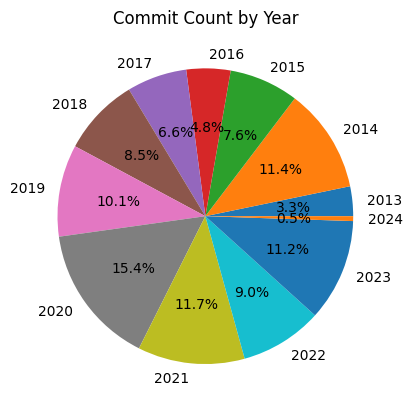

In [59]:
plt.pie(df_grouped2['year_count'], labels=df_grouped2['year'], autopct='%1.1f%%')
plt.title('Commit Count by Year')
plt.show()